# How to Read Large Dataset
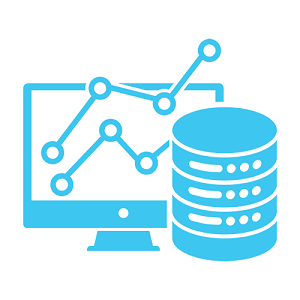


When you need to read large dataset which has size greater than RAM, your system will run out of RAM while reading such a huge amount of data, and this also might lead to kernel shutdown in notebook or system crash.

Python data scientists often use Pandas for working with tables. While Pandas is perfect for small to medium-sized datasets, larger ones are problematic.

In this kernel, I show how to deal with large datasets using other techniques

* [1-Pandas](#1)
* [2-Dask](#2)
* [3-Datatable](#3)
* [4-Rapids](#4)



<a id="1"></a>
# 1-Pandas

Pandas provides data structures for in-memory analytics, which makes using pandas to analyze datasets that are larger than memory datasets somewhat tricky. Even datasets that are a sizable fraction of memory become unwieldy, as some pandas operations need to make intermediate copies.

This document ([Scaling to large datasets](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html)) provides a few recommendations for scaling your analysis to larger datasets. It’s a complement to Enhancing performance, which focuses on speeding up analysis for datasets that fit in memory.



Reference: https://pandas.pydata.org/docs/

In [ ]:
import pandas as pd

In [ ]:
%%time
train1 = pd.read_csv("../input/jane-street-market-prediction/train.csv")
print("Data size:", train1.shape)

In [ ]:
train1.head(5)

In [ ]:
del(train1)

<a id="2"></a>
# 2-Dask

A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along the index. These Pandas DataFrames may live on disk for larger-than-memory computing on a single machine, or on many different machines in a cluster. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames

## When Dask is  the best choice?
* Manipulating large datasets, even when those datasets don’t fit in memory
* Accelerating long computations by using many cores
* Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations

## When Dask DataFrame may not be the best choice?
* If your dataset fits comfortably into RAM on your laptop, then you may be better off just using Pandas. There may be simpler ways to improve performance than through parallelism
* If your dataset doesn’t fit neatly into the Pandas tabular model, then you might find more use in dask.bag or dask.array
* If you need functions that are not implemented in Dask DataFrame, then you might want to look at dask.delayed which offers more flexibility
* If you need a proper database with all that databases offer you might prefer something like Postgres

Reference: https://docs.dask.org/en/latest/

In [ ]:
import dask.dataframe as dd

In [ ]:
%%time
train2 = dd.read_csv("../input/jane-street-market-prediction/train.csv").compute()
print("Data size:", train2.shape)

In [ ]:
train2.head(5)

In [ ]:
del(train2)

<a id="3"></a>
# 3-Datatable
The Datatable is a python library for manipulating tabular data.  It is super fast, much faster than pandas and has the ability to work with out-of-memory datasets, multi-threaded data processing, and flexible API.for its performance, it is on path to become a must-use package for data manipulation in python.

Reference: https://datatable.readthedocs.io/en/latest/index.html

In [ ]:
!pip install ../input/python-datatable/datatable-0.11.0-cp37-cp37m-manylinux2010_x86_64.whl
import datatable as dt

In [ ]:
%%time
train3 = dt.fread("../input/jane-street-market-prediction/train.csv")
print("Data size:", train3.shape)

In [ ]:
train3.head(5)

In [ ]:
del(train3)

<a id="4"></a>
# 4-Rapids

The RAPIDS suite of open source software libraries and APIs gives you the ability to execute end-to-end data science and analytics pipelines entirely on GPUs.

Reference: https://docs.rapids.ai/

make sure to turn on GPU

In [ ]:
import sys
!cp ../input/rapids/rapids.0.15.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path 
!cp /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/

import cudf

In [ ]:
%%time
train4 = cudf.read_csv("../input/jane-street-market-prediction/train.csv")
print("Data size:", train4.shape)

In [ ]:
train4.head(5)

# PLEASE UPVOTE if you like this kernel.


## References
https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets